In [1]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.3)
plt.rcParams['figure.dpi'] = 50

Create a simple 2D array and plot it

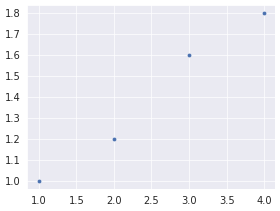

In [2]:
data_x = np.array([1.0, 2.0, 3.0, 4.0])
data_y = np.array([1.0, 1.2, 1.6, 1.8])

sns.scatterplot(x=data_x, y=data_y);

## y = mx + c

i.e. Get the slope & intercept

In [3]:
model = LinearRegression().fit(X=data_x.reshape(-1, 1), y=data_y)

print('y = mx + c', '\n')
print('m =', model.coef_)
print('c =', model.intercept_)

y = mx + c 

m = [0.28]
c = 0.7000000000000002


## Drawing straigh-line graph

#### Manual approach

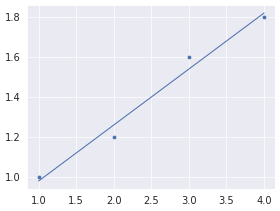

In [4]:
x = np.array([1, 4])
y = np.array([(1*0.28)+0.7,
              (4*0.28)+0.7])

sns.scatterplot(x=data_x, y=data_y);
sns.lineplot(x=x, y=y);

#### Use a function f(x)

define the function

In [5]:
def f(x):
    m = 0.28
    c = 0.7
    return m*x + c

use the function

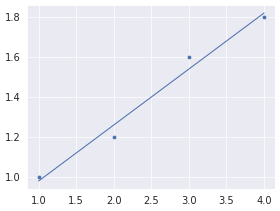

In [6]:
x = np.array([1, 4])
y = f(x)

sns.scatterplot(x=data_x, y=data_y);
sns.lineplot(x=x, y=y);

## Coordinates and Ratio

Find the <B>mid-point</B> using the <B>average</B> of the <B>end points</B>

In [7]:
print('x =', x)
print('y =', y)

(x.mean(), y.mean())

x = [1 4]
y = [0.98 1.82]


(2.5, 1.4)

## Real world data

**Number of Instances:** 442

**Target variable (y):**
Quantitative measure of disease progression one year after baseline

**Features (X):**
1. age: Age in years
2. sex
3. bmi: Body mass index
4. bp: Average blood pressure
5. s1: Total serum cholesterol (tc)
6. s2: Low-density lipoproteins (ldl)
7. s3: High-density lipoproteins (hdl)
8. s4: Total cholesterol / HDL (tch)
9. s5: Possibly log of serum triglycerides level (ltg)
10. s6: Blood sugar level (glu)


In [8]:
data = load_diabetes()
df = pd.DataFrame(
    data=np.concatenate((data.data, data.target.reshape(-1, 1)), axis=1),
    columns=data.feature_names + ['disease_progression'],
).astype({'disease_progression': int})
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,disease_progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135


Scatterplot with linear regression line

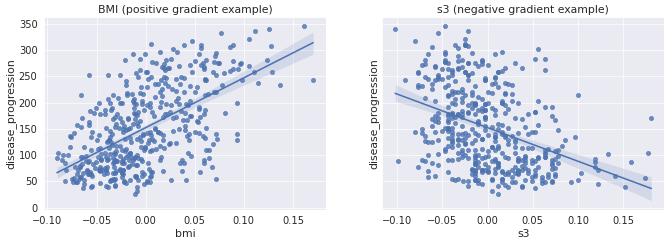

In [9]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(16, 5))
sns.regplot(data=df, x='bmi', y='disease_progression', ax=ax[0]).set_title('BMI (positive gradient example)')
sns.regplot(data=df, x='s3', y='disease_progression', ax=ax[1]).set_title('s3 (negative gradient example)')
plt.show()

### For fun...

In [10]:
X = df.drop('disease_progression', axis=1)
X.loc[:, :] = StandardScaler().fit_transform(X)
X = sm.add_constant(X)
y = df['disease_progression']

model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     disease_progression   R-squared:                       0.518
Model:                             OLS   Adj. R-squared:                  0.507
Method:                  Least Squares   F-statistic:                     46.27
Date:                 Sun, 05 Nov 2023   Prob (F-statistic):           3.83e-62
Time:                         09:25:25   Log-Likelihood:                -2386.0
No. Observations:                  442   AIC:                             4794.
Df Residuals:                      431   BIC:                             4839.
Df Model:                           10                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.576     59.061      0.000     147.071     157.196
age           -0.4761      2.842     -0.168      0.867      -6.062       5.110
sex          -11.4069      2.912     -3.917      0.000     -17.130      -5.683
bmi           24.7265      3.165      7.813      0.000      18.506      30.947
bp            15.4294      3.112      4.958      0.000       9.313      21.546
s1           -37.6800     19.819     -1.901      0.058     -76.635       1.275
s2            22.6762     16.126      1.406      0.160      -9.019      54.372
s3             4.8061     10.109      0.475      0.635     -15.063      24.675
s4             8.4220      7.681      1.097      0.273      -6.674      23.518
s5            35.7344      8.176      4.370      0.000      19.664      51.805
s6             3.2167      3.139      1.025      0.306      -2.952       9.385
==============================================================================
Omnibus:                        1.506   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.471   Jarque-Bera (JB):                1.404
Skew:                           0.017   Prob(JB):                        0.496
Kurtosis:                       2.726   Cond. No.                         21.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""